In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print X[4:10]
print y[4:10]

[[ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
[0 0 0 0 0 0]


In [5]:
# Split the data into train and test through random shuffling

np.random.seed(410)
test_size = int(0.2 * len(y))
indices = np.random.permutation(len(X))

X_train = X[ indices[:-test_size]]
y_train = y[ indices[:-test_size]]
X_test = X[ indices[-test_size:]]
y_test = y[ indices[-test_size:]]

print X_train.shape, X_test.shape

(120, 4) (30, 4)


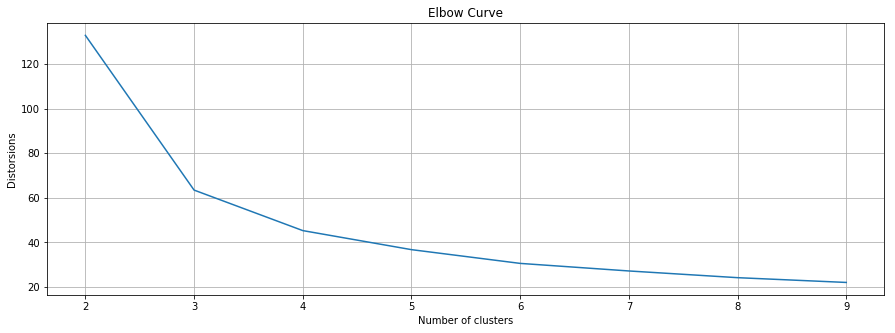

In [15]:
# Method 1 - Elbow Method
distorsions = []
min_k = 2
max_k = int(math.sqrt(X_train.shape[0]))
for k in range(min_k, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(min_k, max_k), distorsions)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Distorsions')
plt.title('Elbow Curve')


# from the plot below, 3 clusters have the smallest inside angle, so we can choose k=3 for clustering
## from the plot, we can also say the data is not well clustered, because elbow is not very clear to see

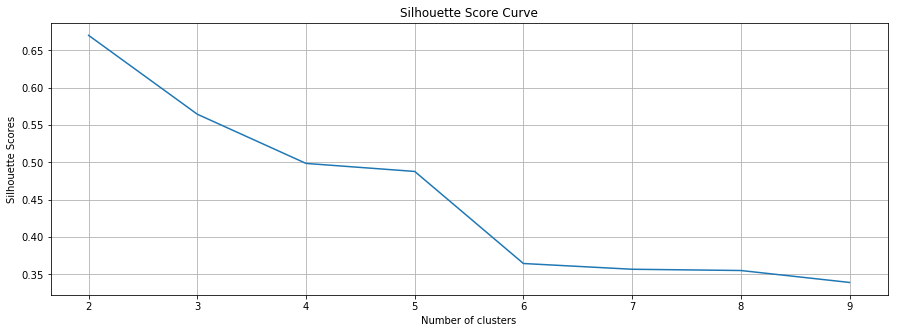

In [25]:
# Method 2 - Silhouette Score

silhouette_scores = []
min_k = 2
max_k = int(math.sqrt(X_train.shape[0]))
for k in range(min_k, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    labels = kmeans.labels_   # the predicted cluster number for each records
    s_score = silhouette_score(X_train, labels, metric='euclidean', random_state=410) 
    silhouette_scores.append(s_score)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(min_k, max_k), silhouette_scores)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Score Curve')

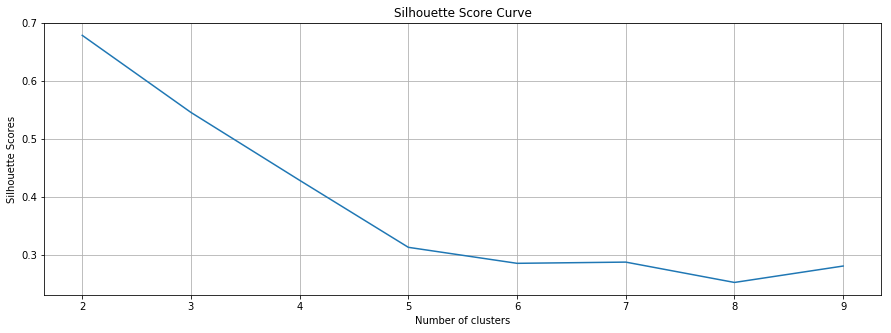

In [23]:
# try normalized data with silhouette_scores
sc = StandardScaler()
silhouette_scores = []
min_k = 2
max_k = int(math.sqrt(X_train.shape[0]))
for k in range(min_k, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sc.fit_transform(X_train))  # normalized the data
    labels = kmeans.labels_   # the predicted cluster number for each records
    s_score = silhouette_score(X_train, labels, metric='euclidean', random_state=410) 
    silhouette_scores.append(s_score)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(min_k, max_k), silhouette_scores)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Score Curve')

In [ ]:
"""
The number of clusters that give the highest Silhouette Score tend to be optimal
So, in Silhouette Score plot, 2 clusters provide better result
NOTE: cannot choose k=1
"""